In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import bayesianinference as bi


In [2]:
bi.__version__

'v0.24'

## Example: Effect of Screener Questions on # of posOutcome

* The hypothesis is that an advertiser who uses screener questions (SQ) are able to focus on more qualified candidates and leads to a larger # of posOutcome.
* Data is collected between 2019-02-01 and 2019-04-01.
    * SQ: screener questions, 1 if the advertiser was shown screener question when posting the first job, otherwise 0
    * \# of posOutcome: number of posOutcome in all jobs posted by an advertiser during the test period, which we assume to be a Poisson random variable.

* We use the poisson-gamma framework for the analysis.

In [3]:
df = pd.read_csv("IQ_utility_posOutcome.csv")
metric, treatment = "#_of_posOutcomes", "SQ"

# t means treatment (shown SQ), c means control (not shown SQ)
treatment_data = df[(df[treatment] == 1)][metric]
control_data = df[(df[treatment] == 0)][metric]


## Using PYMC3 to sample from posterior distributions

In [4]:
model = bi.PoissonGamma(treatment_data, control_data, alpha=1, beta=1)
model.draw()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2519.82draws/s]
The acceptance probability does not match the target. It is 0.8895496557005322, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8847628040006351, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2295.59draws/s]


In [5]:
model.summary_posterior_distributions()

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
treatment,3.296135,0.018058,0.000409,3.261930,3.332505,1996.913731,1.000336
control,3.287488,0.018403,0.000454,3.252338,3.323355,1766.810817,0.999868


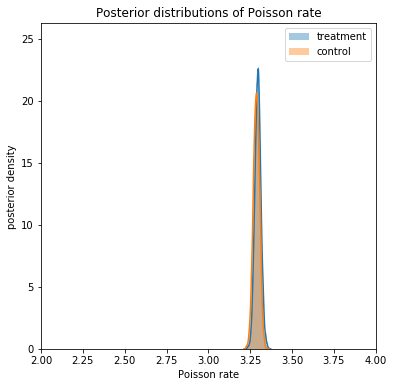

In [6]:
# plot posterior distributions
plt.figure(figsize=(6,6))
model.plot_posterior_distributions(title = "Posterior distributions of Poisson rate", 
                                   xmin=2, 
                                   xmax=4)


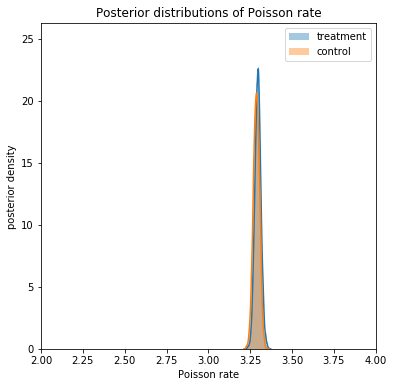

In [7]:
# plot posterior distributions: zoom in
plt.figure(figsize=(6,6))
model.plot_posterior_distributions(title = "Posterior distributions of Poisson rate", 
                                   xmin=2, 
                                   xmax=4)


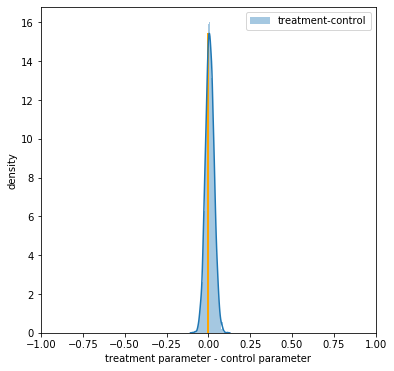

In [8]:
#plot distribution of difference in posterior possion rate
plt.figure(figsize=(6,6))
model.plot_distribution_of_diff(title = "Posterior distribution of difference in Poisson rate", 
                                xmin = -1, 
                                xmax = 1)

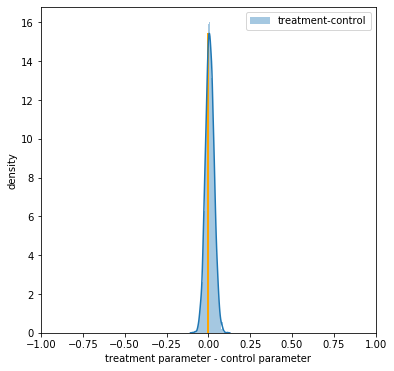

In [9]:
#plot distribution of difference in posterior possion rate: zoom in
plt.figure(figsize=(6,6))
model.plot_distribution_of_diff(title = "Posterior distribution of difference in Poisson rate", 
                                xmin = -1, 
                                xmax = 1)

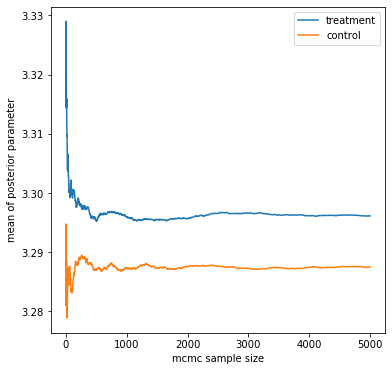

In [10]:
plt.figure(figsize=(6,6))
model.params_vs_mcmc_sample_size()

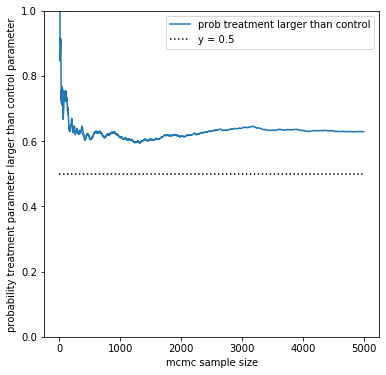

stabilized probability that treatment is larger than control : 0.6288


In [11]:
plt.figure(figsize=(6,6))
model.prob_treatment_larger_than_control_vs_mcmc_sample_size()

### Robustness against prior parameters

In [12]:
probs = []
alpha_grid = range(1,11,1)
beta_grid = np.linspace(0.4, 4, num=10)
for alpha in alpha_grid:
    probs_sub = []
    for beta in beta_grid:
        print(alpha, beta)
        model = bi.PoissonGamma(treatment_data, control_data, alpha=alpha, beta=beta)
        model.draw()
        probs_sub.append(model.posterior_prob_treatment_larger_than_control())
    probs.append(probs_sub)


1 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2391.39draws/s]
The acceptance probability does not match the target. It is 0.8946411122072576, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2234.47draws/s]
The acceptance probability does not match the target. It is 0.8790570702401022, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.90863392369821, but should be close to 0.8. Try to increase the number of tuning steps.


1 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2167.05draws/s]
The acceptance probability does not match the target. It is 0.8882143152190285, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2426.58draws/s]
The acceptance probability does not match the target. It is 0.8916355432164059, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8838990547366896, but should be close to 0.8. Try to increase the number of tuning steps.


1 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2423.15draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2410.92draws/s]
The acceptance probability does not match the target. It is 0.8894345142481976, but should be close to 0.8. Try to increase the number of tuning steps.


1 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2527.59draws/s]
The acceptance probability does not match the target. It is 0.8858302153598181, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2463.43draws/s]
The acceptance probability does not match the target. It is 0.9070692456439036, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8961838579357833, but should be close to 0.8. Try to increase the number of tuning steps.


1 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2433.88draws/s]
The acceptance probability does not match the target. It is 0.8986827889382213, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2417.61draws/s]
The acceptance probability does not match the target. It is 0.8915121032004932, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8960737590223554, but should be close to 0.8. Try to increase the number of tuning steps.


1 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2427.06draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2382.66draws/s]
The acceptance probability does not match the target. It is 0.8904410114361918, but should be close to 0.8. Try to increase the number of tuning steps.


1 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2252.96draws/s]
The acceptance probability does not match the target. It is 0.9167893667316187, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9106869485947526, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2351.79draws/s]
The acceptance probability does not match the target. It is 0.8956079023485446, but should be close to 0.8. Try to increase the number of tuning steps.


1 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2350.34draws/s]
The acceptance probability does not match the target. It is 0.9015776338615622, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8991034436448586, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2322.82draws/s]
The acceptance probability does not match the target. It is 0.8837320915070945, but should be close to 0.8. Try to increase the number of tuning steps.


1 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2273.07draws/s]
The acceptance probability does not match the target. It is 0.886022505393377, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8835082946187208, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2186.56draws/s]
The acceptance probability does not match the target. It is 0.9097695878078105, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8846308757351837, but should be close to 0.8. Try t

1 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2489.28draws/s]
The acceptance probability does not match the target. It is 0.8879110984151638, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8822271275239576, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2396.86draws/s]
The acceptance probability does not match the target. It is 0.8858056239491742, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8993918021560264, but should be close to 0.8. Try 

2 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2554.97draws/s]
The acceptance probability does not match the target. It is 0.8952979967218115, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8801703984491427, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2237.00draws/s]
The acceptance probability does not match the target. It is 0.8969949427819928, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8845327208586508, but should be close to 0.8. Try 

2 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2437.31draws/s]
The acceptance probability does not match the target. It is 0.8789689411882178, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2424.31draws/s]
The acceptance probability does not match the target. It is 0.896451227555145, but should be close to 0.8. Try to increase the number of tuning steps.


2 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2389.50draws/s]
The acceptance probability does not match the target. It is 0.9101045288131211, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8915094530878892, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2369.99draws/s]
The acceptance probability does not match the target. It is 0.8844273590410305, but should be close to 0.8. Try to increase the number of tuning steps.


2 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2371.83draws/s]
The acceptance probability does not match the target. It is 0.9094273658997006, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8876871236745604, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2320.01draws/s]
The acceptance probability does not match the target. It is 0.8826595081009444, but should be close to 0.8. Try to increase the number of tuning steps.


2 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2372.74draws/s]
The acceptance probability does not match the target. It is 0.8960772909552901, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9001818469708874, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2479.47draws/s]
The acceptance probability does not match the target. It is 0.8887391742484335, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8833270363025194, but should be close to 0.8. Try 

2 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2194.38draws/s]
The acceptance probability does not match the target. It is 0.8997684969126922, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2361.54draws/s]
The acceptance probability does not match the target. It is 0.9028576746728323, but should be close to 0.8. Try to increase the number of tuning steps.


2 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2411.40draws/s]
The acceptance probability does not match the target. It is 0.887192516453299, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8939981285774669, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2283.31draws/s]
The acceptance probability does not match the target. It is 0.9132920912673598, but should be close to 0.8. Try to increase the number of tuning steps.


2 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2436.22draws/s]
The acceptance probability does not match the target. It is 0.8869287414834206, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2009.63draws/s]
The acceptance probability does not match the target. It is 0.8865519239735586, but should be close to 0.8. Try to increase the number of tuning steps.


2 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2171.05draws/s]
The acceptance probability does not match the target. It is 0.8802110111275793, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9053831115298457, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2271.14draws/s]
The acceptance probability does not match the target. It is 0.8800985624596623, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9048958082878544, but should be close to 0.8. Try 

2 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2377.73draws/s]
The acceptance probability does not match the target. It is 0.8899862659189831, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2452.14draws/s]
The acceptance probability does not match the target. It is 0.8871554016622727, but should be close to 0.8. Try to increase the number of tuning steps.


3 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2515.59draws/s]
The acceptance probability does not match the target. It is 0.9003987829011746, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2417.78draws/s]
The acceptance probability does not match the target. It is 0.9002159006890275, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8931104273871395, but should be close to 0.8. Try to increase the number of tuning steps.


3 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2094.23draws/s]
The acceptance probability does not match the target. It is 0.8918106890993405, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8987133399917724, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2393.35draws/s]
The acceptance probability does not match the target. It is 0.8826077698007158, but should be close to 0.8. Try to increase the number of tuning steps.


3 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2222.07draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2474.61draws/s]
The acceptance probability does not match the target. It is 0.9007765066438589, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8895445258900562, but should be close to 0.8. Try to increase the number of tuning steps.


3 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2442.04draws/s]
The acceptance probability does not match the target. It is 0.8874235458277877, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2374.59draws/s]
The acceptance probability does not match the target. It is 0.8877859575238362, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8843519304201837, but should be close to 0.8. Try to increase the number of tuning steps.


3 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2454.04draws/s]
The acceptance probability does not match the target. It is 0.8788171927567444, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2058.60draws/s]
The acceptance probability does not match the target. It is 0.89978985900553, but should be close to 0.8. Try to increase the number of tuning steps.


3 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2169.19draws/s]
The acceptance probability does not match the target. It is 0.897555949893016, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2206.52draws/s]
The acceptance probability does not match the target. It is 0.8875698430959927, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8890926905306671, but should be close to 0.8. Try to increase the number of tuning steps.


3 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2404.47draws/s]
The acceptance probability does not match the target. It is 0.8852670088395992, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8887817446453948, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2266.49draws/s]
The acceptance probability does not match the target. It is 0.885174955140592, but should be close to 0.8. Try to increase the number of tuning steps.


3 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2260.66draws/s]
The acceptance probability does not match the target. It is 0.8889553692839889, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8988896810275854, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2122.42draws/s]
The acceptance probability does not match the target. It is 0.8877635980764053, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9030589783169082, but should be close to 0.8. Try 

3 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2487.58draws/s]
The acceptance probability does not match the target. It is 0.8836200451915507, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2343.26draws/s]
The acceptance probability does not match the target. It is 0.9022668522287102, but should be close to 0.8. Try to increase the number of tuning steps.


3 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2126.12draws/s]
The acceptance probability does not match the target. It is 0.9062525937584264, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8836930889551992, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2190.35draws/s]
The acceptance probability does not match the target. It is 0.8824113940888917, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9144603246620157, but should be close to 0.8. Try 

4 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2290.75draws/s]
The acceptance probability does not match the target. It is 0.8997419376346184, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8823139018977303, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2498.42draws/s]


4 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2529.40draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2085.51draws/s]
The acceptance probability does not match the target. It is 0.8800382977557276, but should be close to 0.8. Try to increase the number of tuning steps.


4 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2449.35draws/s]
The acceptance probability does not match the target. It is 0.9054972438578237, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2416.85draws/s]
The acceptance probability does not match the target. It is 0.889020972670275, but should be close to 0.8. Try to increase the number of tuning steps.


4 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2396.47draws/s]
The acceptance probability does not match the target. It is 0.8793190369684811, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2468.42draws/s]


4 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2453.83draws/s]
The acceptance probability does not match the target. It is 0.8870893792234619, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2394.78draws/s]
The acceptance probability does not match the target. It is 0.8930753226660624, but should be close to 0.8. Try to increase the number of tuning steps.


4 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2508.31draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2540.31draws/s]
The acceptance probability does not match the target. It is 0.8886213451207791, but should be close to 0.8. Try to increase the number of tuning steps.


4 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2475.96draws/s]
The acceptance probability does not match the target. It is 0.8813495011147459, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2319.66draws/s]
The acceptance probability does not match the target. It is 0.8812802914894595, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9109513196091769, but should be close to 0.8. Try to increase the number of tuning steps.


4 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2402.38draws/s]
The acceptance probability does not match the target. It is 0.902839996307233, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2437.61draws/s]
The acceptance probability does not match the target. It is 0.881960970497405, but should be close to 0.8. Try to increase the number of tuning steps.


4 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2390.59draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2459.38draws/s]
The acceptance probability does not match the target. It is 0.8893382104688612, but should be close to 0.8. Try to increase the number of tuning steps.


4 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2317.67draws/s]
The acceptance probability does not match the target. It is 0.8933072366730764, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2328.13draws/s]
The acceptance probability does not match the target. It is 0.888914832014836, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9015845893207282, but should be close to 0.8. Try to increase the number of tuning steps.


5 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2521.47draws/s]
The acceptance probability does not match the target. It is 0.8932003857006137, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2368.88draws/s]
The acceptance probability does not match the target. It is 0.9062318102590686, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8948403041478953, but should be close to 0.8. Try to increase the number of tuning steps.


5 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2489.70draws/s]
The acceptance probability does not match the target. It is 0.8847832066297429, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9053097969739188, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2494.83draws/s]
The acceptance probability does not match the target. It is 0.8788747644988026, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8887475269651937, but should be close to 0.8. Try 

5 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2409.88draws/s]
The acceptance probability does not match the target. It is 0.8849858945680161, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8945720495991689, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2509.01draws/s]
The acceptance probability does not match the target. It is 0.8879447384163986, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8789902280818594, but should be close to 0.8. Try 

5 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2600.75draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2482.46draws/s]
The acceptance probability does not match the target. It is 0.89980259503451, but should be close to 0.8. Try to increase the number of tuning steps.


5 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2503.76draws/s]
The acceptance probability does not match the target. It is 0.8990445911064723, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2484.46draws/s]
The acceptance probability does not match the target. It is 0.8846588195619122, but should be close to 0.8. Try to increase the number of tuning steps.


5 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2554.21draws/s]
The acceptance probability does not match the target. It is 0.8925251335526877, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2422.87draws/s]


5 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2523.16draws/s]
The acceptance probability does not match the target. It is 0.8885540674906753, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9006815116535092, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2558.58draws/s]


5 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2427.73draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2498.10draws/s]


5 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2481.63draws/s]
The acceptance probability does not match the target. It is 0.8801755337021366, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8861186870583291, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2449.45draws/s]
The acceptance probability does not match the target. It is 0.9061225132599414, but should be close to 0.8. Try to increase the number of tuning steps.


5 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2450.34draws/s]
The acceptance probability does not match the target. It is 0.8996506060861924, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8836141120883072, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2473.24draws/s]
The acceptance probability does not match the target. It is 0.8847990235415457, but should be close to 0.8. Try to increase the number of tuning steps.


6 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2452.52draws/s]
The acceptance probability does not match the target. It is 0.8974767389300243, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8929395935016252, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2554.92draws/s]


6 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2480.76draws/s]
The acceptance probability does not match the target. It is 0.883707877183264, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2506.37draws/s]


6 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2558.28draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2292.87draws/s]
The acceptance probability does not match the target. It is 0.8810797941145209, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9015999153382881, but should be close to 0.8. Try to increase the number of tuning steps.


6 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2449.96draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2510.42draws/s]
The acceptance probability does not match the target. It is 0.8955688293415132, but should be close to 0.8. Try to increase the number of tuning steps.


6 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2345.92draws/s]
The acceptance probability does not match the target. It is 0.9055700804162031, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2491.64draws/s]
The acceptance probability does not match the target. It is 0.8843834188044474, but should be close to 0.8. Try to increase the number of tuning steps.


6 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2520.07draws/s]
The acceptance probability does not match the target. It is 0.8833555433968665, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2352.20draws/s]


6 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2435.96draws/s]
The acceptance probability does not match the target. It is 0.8862246042152712, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.892082557971697, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2261.39draws/s]
The acceptance probability does not match the target. It is 0.8792800753206662, but should be close to 0.8. Try to increase the number of tuning steps.


6 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2450.40draws/s]
The acceptance probability does not match the target. It is 0.8870483650249237, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8885012063131048, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2374.14draws/s]
The acceptance probability does not match the target. It is 0.9022469722535706, but should be close to 0.8. Try to increase the number of tuning steps.


6 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2424.67draws/s]
The acceptance probability does not match the target. It is 0.8939836800907132, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8827583271688806, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2375.69draws/s]
The acceptance probability does not match the target. It is 0.8928606080512623, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9005570889599369, but should be close to 0.8. Try 

6 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2538.92draws/s]
The acceptance probability does not match the target. It is 0.893051197982996, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2402.50draws/s]
The acceptance probability does not match the target. It is 0.8867189361920791, but should be close to 0.8. Try to increase the number of tuning steps.


7 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2263.06draws/s]
The acceptance probability does not match the target. It is 0.8811188197653105, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8935882740604879, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2341.87draws/s]
The acceptance probability does not match the target. It is 0.8878468529464568, but should be close to 0.8. Try to increase the number of tuning steps.


7 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2439.48draws/s]
The acceptance probability does not match the target. It is 0.8953923838376315, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2379.84draws/s]
The acceptance probability does not match the target. It is 0.8810425188882443, but should be close to 0.8. Try to increase the number of tuning steps.


7 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2376.28draws/s]
The acceptance probability does not match the target. It is 0.8800034733959762, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2383.22draws/s]
The acceptance probability does not match the target. It is 0.8833822664140161, but should be close to 0.8. Try to increase the number of tuning steps.


7 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2521.84draws/s]
The acceptance probability does not match the target. It is 0.8839124190376247, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2554.66draws/s]


7 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2390.01draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2430.82draws/s]
The acceptance probability does not match the target. It is 0.9003991737985395, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8924886187280012, but should be close to 0.8. Try to increase the number of tuning steps.


7 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2113.43draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1795.83draws/s]


7 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1891.43draws/s]
The acceptance probability does not match the target. It is 0.8830607655525856, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2093.05draws/s]


7 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2298.68draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2147.69draws/s]
The acceptance probability does not match the target. It is 0.88397846040979, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8981138971273288, but should be close to 0.8. Try to increase the number of tuning steps.


7 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2218.65draws/s]
The acceptance probability does not match the target. It is 0.8871354488054678, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2451.56draws/s]
The acceptance probability does not match the target. It is 0.9014187240261781, but should be close to 0.8. Try to increase the number of tuning steps.


7 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2036.88draws/s]
The acceptance probability does not match the target. It is 0.8792883163569408, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8832386153600514, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1727.46draws/s]


8 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1770.21draws/s]
The acceptance probability does not match the target. It is 0.8928881016974615, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2386.02draws/s]
The acceptance probability does not match the target. It is 0.8883502022879423, but should be close to 0.8. Try to increase the number of tuning steps.


8 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2471.99draws/s]
The acceptance probability does not match the target. It is 0.879243173868061, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2098.54draws/s]
The acceptance probability does not match the target. It is 0.8820816151129802, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8898271031049221, but should be close to 0.8. Try to increase the number of tuning steps.


8 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1992.43draws/s]
The acceptance probability does not match the target. It is 0.8928441068354768, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2404.15draws/s]
The acceptance probability does not match the target. It is 0.8933349168990381, but should be close to 0.8. Try to increase the number of tuning steps.


8 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2570.47draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2520.83draws/s]
The acceptance probability does not match the target. It is 0.8795895329827161, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8937136883947662, but should be close to 0.8. Try to increase the number of tuning steps.


8 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2786.43draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2712.45draws/s]
The acceptance probability does not match the target. It is 0.8938280255825194, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8830054109167249, but should be close to 0.8. Try to increase the number of tuning steps.


8 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2401.43draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2548.08draws/s]
The acceptance probability does not match the target. It is 0.8803745642574694, but should be close to 0.8. Try to increase the number of tuning steps.


8 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2393.07draws/s]
The acceptance probability does not match the target. It is 0.8820925362702691, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2352.77draws/s]
The acceptance probability does not match the target. It is 0.8849719060116996, but should be close to 0.8. Try to increase the number of tuning steps.


8 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2748.14draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2607.12draws/s]
The acceptance probability does not match the target. It is 0.8925643802820943, but should be close to 0.8. Try to increase the number of tuning steps.


8 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2622.32draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2684.68draws/s]


8 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2636.25draws/s]
The acceptance probability does not match the target. It is 0.8861527717084469, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2709.02draws/s]
The acceptance probability does not match the target. It is 0.8849742039933791, but should be close to 0.8. Try to increase the number of tuning steps.


9 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2534.72draws/s]
The acceptance probability does not match the target. It is 0.8997454814122643, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2599.12draws/s]
The acceptance probability does not match the target. It is 0.8956990150179427, but should be close to 0.8. Try to increase the number of tuning steps.


9 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2638.48draws/s]
The acceptance probability does not match the target. It is 0.9077364617400128, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8952397131085955, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2500.74draws/s]
The acceptance probability does not match the target. It is 0.8819990417503549, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8850714448655203, but should be close to 0.8. Try 

9 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2729.19draws/s]
The acceptance probability does not match the target. It is 0.887488438184551, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2800.49draws/s]
The acceptance probability does not match the target. It is 0.8820253924121217, but should be close to 0.8. Try to increase the number of tuning steps.


9 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2820.27draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2859.94draws/s]
The acceptance probability does not match the target. It is 0.8885316561664904, but should be close to 0.8. Try to increase the number of tuning steps.


9 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2854.06draws/s]
The acceptance probability does not match the target. It is 0.8897351098563225, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2710.34draws/s]
The acceptance probability does not match the target. It is 0.8935316477556539, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8802957220025646, but should be close to 0.8. Try to increase the number of tuning steps.


9 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2755.74draws/s]
The acceptance probability does not match the target. It is 0.8853969381652302, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2746.51draws/s]
The acceptance probability does not match the target. It is 0.8839363676295134, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8958316049912681, but should be close to 0.8. Try to increase the number of tuning steps.


9 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2897.29draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2841.90draws/s]
The acceptance probability does not match the target. It is 0.8884080615722345, but should be close to 0.8. Try to increase the number of tuning steps.


9 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2821.53draws/s]
The acceptance probability does not match the target. It is 0.8827599621076903, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2713.14draws/s]


9 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2700.45draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2814.88draws/s]


9 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2576.64draws/s]
The acceptance probability does not match the target. It is 0.8815077924104231, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2401.80draws/s]
The acceptance probability does not match the target. It is 0.8794188429086726, but should be close to 0.8. Try to increase the number of tuning steps.


10 0.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2440.81draws/s]
The acceptance probability does not match the target. It is 0.8881140087732037, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8786197118310354, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2525.52draws/s]
The acceptance probability does not match the target. It is 0.8902324208814466, but should be close to 0.8. Try to increase the number of tuning steps.


10 0.8


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2689.22draws/s]
The acceptance probability does not match the target. It is 0.9044920413922753, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8877474204338822, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2790.98draws/s]
The acceptance probability does not match the target. It is 0.8904070337750699, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8814879242595476, but should be close to 0.8. Try 

10 1.2000000000000002


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2778.29draws/s]
The acceptance probability does not match the target. It is 0.890424727229367, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9042782362468771, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2782.79draws/s]
The acceptance probability does not match the target. It is 0.9090611823847488, but should be close to 0.8. Try to increase the number of tuning steps.


10 1.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2470.12draws/s]
The acceptance probability does not match the target. It is 0.8973388473632289, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2685.59draws/s]


10 2.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2792.40draws/s]
The acceptance probability does not match the target. It is 0.8794168761337596, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2809.76draws/s]
The acceptance probability does not match the target. It is 0.906168665989469, but should be close to 0.8. Try to increase the number of tuning steps.


10 2.4


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2829.69draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2861.22draws/s]


10 2.8000000000000003


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2852.73draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2726.80draws/s]
The acceptance probability does not match the target. It is 0.8822588966152759, but should be close to 0.8. Try to increase the number of tuning steps.


10 3.2


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2869.78draws/s]
The acceptance probability does not match the target. It is 0.8928824539741267, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2852.18draws/s]


10 3.6


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2900.50draws/s]
The acceptance probability does not match the target. It is 0.8788743324526118, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2674.63draws/s]
The acceptance probability does not match the target. It is 0.8799333493447742, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.881037658690681, but should be close to 0.8. Try to increase the number of tuning steps.


10 4.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2508.32draws/s]
The acceptance probability does not match the target. It is 0.8845107345569976, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [Poisson rate]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2441.85draws/s]
The acceptance probability does not match the target. It is 0.8948321567444892, but should be close to 0.8. Try to increase the number of tuning steps.


In [13]:
robust_mat = pd.DataFrame(probs, columns = [round(beta, 1) for beta in beta_grid])
robust_mat.index=alpha_grid
robust_mat.index.name ="alpha/beta"
robust_mat.reset_index()
robust_mat


,0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6,4.0
alpha/beta,,,,,,,,,,
1,0.6250,0.6276,0.6292,0.6324,0.6424,0.6268,0.6316,0.6356,0.6210,0.6424
2,0.6302,0.6196,0.6306,0.6450,0.6238,0.6232,0.6164,0.6198,0.6380,0.6288
3,0.6282,0.6256,0.6464,0.6258,0.6170,0.6294,0.6246,0.6158,0.6474,0.6398
4,0.6362,0.6300,0.6228,0.6168,0.6338,0.6252,0.6252,0.6338,0.6268,0.6146
5,0.6464,0.6318,0.6240,0.6288,0.6236,0.6376,0.6336,0.6308,0.6302,0.6358
6,0.6322,0.6122,0.6340,0.6476,0.6056,0.6344,0.6160,0.6476,0.6408,0.6242
7,0.6266,0.6296,0.6108,0.6100,0.6320,0.6292,0.6394,0.6162,0.6404,0.6220
8,0.6290,0.6198,0.6346,0.6288,0.6322,0.6092,0.6444,0.6118,0.6096,0.6256
9,0.6466,0.6300,0.6314,0.6112,0.6314,0.6362,0.6324,0.6242,0.6358,0.6250
